# Linear Regression from scratch in Python

Linear Regression is an algorithm for problems in which there is a linear relation between Input variable (X) and Output variable (Y). Here X is called Independent Variable and Y is called Dependent Variable.<br>

This linear relation can be defined as follow.<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
\begin{equation*}
Y = ß_1X + ß_0
\end{equation*}

where<br> 
&emsp; ß0 = Scale Factor<br>
&emsp; ß1 = Bias Coefficient<br>

The equation mentioned above is similar to equation of line which is as follow:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
\begin{equation*}
y = mx+b
\end{equation*}

where<br>
&emsp; m = slope<br>
&emsp; b = intercept<br>

The above two equations are quite similar where m=ß1 and b=ß0.<br>

In Linear Regression, it is required to draw a straight line which estimate the relation between X (Input Variables) and Y (Output Variables). The equation of desired line is given by above. Parameters ß1 and ß0 must be known to draw such a line. There are two approaches to find these parameters ß1 and ß0.<br>
    1. Ordinary Least Square Method
    2. Gradient Descent Approach

## Ordinary Least Square Method

The formulas to find ß1 and ß0 are mentioned below.

\begin{equation*}
ß_1 = \frac{\sum_{i=1}^m (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^m (x_i - \bar{x})^2}
\end{equation*}

\begin{equation*}
ß_0 = \bar{y} - ß_1\bar{x}
\end{equation*}

where<br>
&emsp; x_i = x-coordinateof the point<br>
&emsp; y_i = y-coordinate of the point<br>
&emsp; x_bar = Mean Value of Input Variable X<br>
&emsp; y_bar = Mean Value of Input Variable Y<br>

This method is called "Ordinary Least Square Method". Its Python implementation is given below.

## Python Implementation

##### Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Reading Dataset

In [2]:
dataset = pd.read_csv('dataset.csv')

##### Display Dataset

In [3]:
print(dataset.shape)
dataset.head(10)

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


##### Initializing inputs and outputs

In [4]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

##### Mean of inputs and outputs

In [5]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

##### Total number of values

In [6]:
n = len(X)

##### Using the formula to calculate the ß1 and ß0

In [7]:
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

##### Printing the coefficient

In [8]:
print(b1, b0)

0.26342933948939945 325.57342104944223


Since the values of ß1 nd ß0 are available, therefore now following equation can be used to draw the line.
\begin{equation*}
Y = 0.26342933948939945*X + 325.57342104944223
\end{equation*}
Equation defined above is actually Linear Model.<br>
Following code draws the line.

##### Define range to draw the line

In [9]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

##### Draw 10 evenly spaced Input Numbers (x) between max_x and min_x. Then find the corresponding Output Numbers (y).

In [10]:
x = np.linspace(min_x, max_x, 10)
y = b0 + b1 * x

##### Draw input data and fitting line calculated by coefficients ß1 and ß0

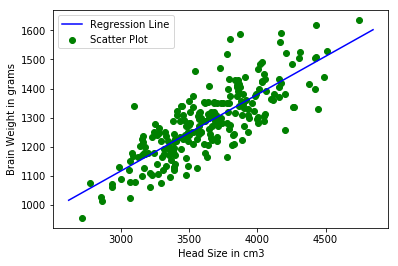

In [11]:
# Ploting Scatter Points
plt.scatter(X, Y, c='g', label='Scatter Plot')
# Ploting Line
plt.plot(x, y, color='b', label='Regression Line')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

Line has been drawn which seems to fit the data quite well but there is a need to evaluate that how good the model is. There are two ways for model evaluation.
    1. Root Mean Square Error
    2. Coefficient of Determination (R^2 Score)

##### Root Mean Square Error

As depicted by its name, it is square root of sum of all errors divided by number of values. Mathematically, it can be written as follow:

\begin{equation*}
RMSE = \sqrt{\sum_{i=1}^m \frac{1}{m} (y_i - \hat{y_i})^2}
\end{equation*}

where<br>
&emsp; y_i = y-coordinate of the point<br>
&emsp; y_hat_i = predicted value for y-coordinate of the point<br>
&emsp; m = total number of points<br>

##### Implementation of Formula for RMSE

In [12]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


##### Coefficient of Determination (R^2 Score)

R^2 Score can be found by following formulas.

\begin{equation*}
SS_t = \sum_{i=1}^m (y_i-\bar{y})^2
\end{equation*}

\begin{equation*}
SS_r = \sum_{i=1}^m (y_i - \hat{y_i})^2
\end{equation*}

\begin{equation*}
R^2 = 1- \frac{SS_r}{SS_t}
\end{equation*}

R^2 Score ranges from 0 to 1. If the model is compltely wrong, then it becomes a negative value.

In [13]:
ss_t = 0
ss_r = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - y_mean) ** 2
    ss_r += (Y[i] - y_pred) **2
    
score  = 1 - (ss_r/ss_t)
print(score)

0.6393117199570003


Implementation of Linear Regression has completed by using scratch Python. "RMSE" and "R^2" obtained above will now be computed with Scikit-Learn Library in order to verify whether we have calculated these values correctly or not.

## Scikit-Learn Approach

##### Importing Libraries

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Reading Dataset

In [15]:
dataset = pd.read_csv('dataset.csv')

##### Initializing inputs and outputs

In [16]:
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

##### Printing the shape of X and Y

In [17]:
print(X.shape)
print(Y.shape)

(237,)
(237,)


##### Reshaping the X

In [18]:
X = X.reshape((n, 1))

##### Creating the Model

In [19]:
lin_reg = LinearRegression()

##### Fitting the training data

In [20]:
lin_reg = lin_reg.fit(X, Y)

##### Predicting output

In [21]:
Y_pred = lin_reg.predict(X)

##### Calculating Root Mean Square Error

In [22]:
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
print(rmse)

72.1206213783709


##### Calculating Coefficient of Detemination (R^2 Score)

In [23]:
r2_score = lin_reg.score(X, Y)
print(r2_score)

0.639311719957


As it can be observed that "RMSE" and "R^2" obtained using both ways are exactly same. Hence, it proves that scratch python implementation of Linear Regression is correct.